In [162]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio.features
import rasterio.warp
import os
import fastkml as fk
import pprint
from lxml import etree
import gdal
import osr

ModuleNotFoundError: No module named 'gdal'

In [130]:
arr = np.random.randint(5,size=(100,100)).astype(np.float)
str(arr.dtype)

'float64'

In [149]:
transform = rasterio.transform.from_origin(-1.915287,14.34397,0.000925395,0.00089989)
x = rasterio.open('Radio_Daande_yali_Sebba.tiff','w',driver='GTiff',height=2000,width=3000,count=2,dtype='float64',crs='EPSG:4326',transform=transform)

In [150]:
print(x.profile)
#x.bounds

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 3000, 'height': 2000, 'count': 2, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.000925395, 0.0, -1.915287,
       0.0, -0.00089989, 14.34397), 'tiled': False, 'interleave': 'pixel'}


In [158]:
x.res

(0.000925395, 0.00089989)

In [157]:
el = x.read(1)
el.shape

UnsupportedOperation: not readable

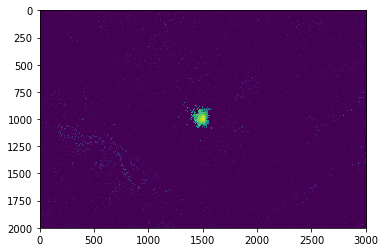

In [146]:
plt.imshow(el)
plt.show()

In [139]:
print(x.crs)

EPSG:4326


In [53]:
os.listdir()

['Radio Daandé yali-Sebba.kml',
 'Radio Daandé yali-Sebba.inf',
 'Radio Daandé yali-Sebba.geo',
 'Radio Daandé yali-Sebba.tiff.aux.xml',
 'Untitled.ipynb',
 'Radio Daandé yali-Sebba.dat',
 '.ipynb_checkpoints',
 'Radio_Daande_yali_Sebba.tiff',
 'Behar',
 'TestQgis']

In [94]:
#No jaló, intento fallido fast kml
mi_kml = open('Radio Daandé yali-Sebba.kml', 'rt')
mi_doc = mi_kml.read()
k = fk.kml.KML()
k.from_string(mi_doc)


In [103]:
tree=etree.parse('Radio Daandé yali-Sebba.kml')
result = tree.xpath('//kml:LatLonBox/kml:north/text()',namespaces={"kml":"http://www.opengis.net/kml/2.2"})
print(result)


[' 14.34397']


In [105]:
tree=etree.parse('Radio Daandé yali-Sebba.kml')
result = tree.xpath('//kml:LatLonBox/kml:east/text()',namespaces={"kml":"http://www.opengis.net/kml/2.2"})
print(result)


[' .8608981']


In [106]:
tree=etree.parse('Radio Daandé yali-Sebba.kml')
result = tree.xpath('//kml:GroundOverlay/kml:color/text()',namespaces={"kml":"http://www.opengis.net/kml/2.2"})
print(result)


['88ffffff']


In [112]:
cardinales = ['north', 'south', 'east', 'west']
bb = []
for i in cardinales:
    tree=etree.parse('Radio Daandé yali-Sebba.kml')
    result = tree.xpath('//kml:LatLonBox/kml:{}/text()'.format(i),namespaces={"kml":"http://www.opengis.net/kml/2.2"})
    
    bb.append(result[0])
print(bb)

[' 14.34397', ' 12.54419', ' .8608981', '-1.915287']


<open DatasetReader name='Radio_Daande_yali_Sebba.tiff' mode='r'>

In [140]:
x.bounds

BoundingBox(left=-1.915287, bottom=12.54419, right=0.8608979999999999, top=14.34397)

In [92]:
k.to_string()

'<kml xmlns="http://www.opengis.net/kml/2.2"/>'

In [89]:
print(mi_doc)

﻿<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2">
<GroundOverlay><name>Radio Daandé yali-Sebba.tiff</name><color>88ffffff</color><Icon>
<href>Radio Daandé yali-Sebba.tiff</href>
<viewBoundScale>0.75</viewBoundScale></Icon><LatLonBox>
<north> 14.34397</north>
<south> 12.54419</south>
<east> .8608981</east>
<west>-1.915287</west>
</LatLonBox></GroundOverlay></kml>



In [23]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open('Radio_Daande_yali_Sebba.tiff') as src:
   oviews = src.overviews(1) # list of overviews from biggest to smallest
   oview = oviews[-1] # let's look at the smallest thumbnail
   print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

/home/urdaibayc/anaconda3/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


IndexError: list index out of range